In [2]:
import pandas as pd
data=pd.read_csv('../input/tutu/changed data.csv')

In [1]:
!pip install pandas==0.24.2

    100% |████████████████████████████████| 10.1MB 4.6MB/s eta 0:00:01  4% |█▌                              | 471kB 14.7MB/s eta 0:00:01
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
data.set_index('Date',inplace=True)

In [4]:
import torch
import torch.nn as nn
from torch.distributions import Categorical


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [5]:
data=data.fillna(1)
split=int(len(data.index)*0.85)
train=data.iloc[:split,:]
test=data.iloc[split:,:]

In [6]:
import numpy as np
def getState(t, data=train, window=30):
    if t - window >= -1:
        vec = data.iloc[t - window + 1:t + 1,:].to_numpy()
    else: 
        x = np.tile(data.iloc[0,:].to_numpy(), (window-t-1, 1))
        y = data.iloc[0: t + 1,:].to_numpy()
        vec = np.vstack((x,y))
    return vec.reshape(1,-1)

In [7]:
train

,STI,HBAN,VIX,spread,splog,dowlog
Date,,,,,,
2002-01-02,62.00,17.25,22.71,44.75,7.051570,7.590473
2002-01-03,62.30,17.45,21.34,44.85,7.060708,7.622796
2002-01-04,62.30,17.77,20.45,44.53,7.066902,7.630160
2002-01-07,62.38,17.71,21.94,44.67,7.060382,7.619283
2002-01-08,60.99,17.74,21.83,43.25,7.056787,7.628391
2002-01-09,61.80,17.64,22.13,44.16,7.051977,7.623099
2002-01-10,61.93,17.80,22.36,44.13,7.053197,7.624248
2002-01-11,61.59,17.72,22.60,43.87,7.043684,7.612070
2002-01-14,60.27,17.46,23.58,42.81,7.037388,7.596262


In [8]:
class Simulator(object):

    def __init__(self, data,data_out):

        # frame a time period as worl
        # initialize cash holdings
        init_cash = 100000

        #for visualization
        #self.data_out = data_out

        self.data_out=data_out
        # first trading day
        self.dateIdx = 0
        #self.date = start_date
        #self.start_date = start_date
        #self.end_date = end_date

        self.data = data
        #self.stockA = data['STI']
        #self.stockB = data['HBAN']

        # keep track of portfolio value as a series
        self.portfolio = {'cash': init_cash, 'a_vol': [], 'a_price': [], 'b_vol': [], 'b_price': [], 'longA': 0}
        self.port_val = 100000

        
    def init_state(self):
        """
        return init states of the market
        """
        states = getState(0)
        self.dateIdx =0
        return states

    def step(self, action):

        buy_volume = 100
    
        if (action == 1):#buy
            if (self.portfolio['longA'] >= 0):

                
                long_cost = buy_volume * self.data.iloc[self.dateIdx,0]

                short_cost = buy_volume * self.data.iloc[self.dateIdx,1]

                total_cost = short_cost + long_cost

                self.portfolio['cash'] -= total_cost

                
                self.portfolio['a_vol'].append(buy_volume)
                self.portfolio['a_price'].append(self.data.iloc[self.dateIdx,0])
                self.portfolio['b_vol'].append(buy_volume)
                self.portfolio['b_price'].append(self.data.iloc[self.dateIdx,1])
                self.portfolio['longA'] = 1

                
                old_port_val = self.port_val
                self.port_val = self.port_value_for_output()

                reward = self.port_val - old_port_val
                

            else: #longA < 0 --> sell in reverse
                long_return = self.portfolio['b_vol'].pop(0) * self.data.iloc[self.dateIdx,1]              
                self.portfolio['b_price'].pop(0)
            
                short_return = self.portfolio['a_vol'][0] * self.portfolio['a_price'][0]
                short_return += (self.portfolio['a_vol'].pop(0) * (self.portfolio['a_price'].pop(0) -self.data.iloc[self.dateIdx,0]))

                
                new_cash = self.portfolio['cash'] + long_return + short_return
                self.portfolio['cash'] = new_cash
                self.portfolio['longA'] = -1 if (len(self.portfolio['a_vol']) > 0) else 0
                old_port_val = self.port_val
                self.port_val = self.port_value_for_output()
                reward = self.port_val - old_port_val
                
        elif (action == 2): #sell
            if (self.portfolio['longA'] > 0):
                long_return = self.portfolio['a_vol'].pop(0) *self.data.iloc[self.dateIdx,0] 
                self.portfolio['a_price'].pop(0)
                
                short_return = self.portfolio['b_vol'][0] * self.portfolio['b_price'][0]
                short_return += (self.portfolio['b_vol'].pop(0) * (self.portfolio['b_price'].pop(0) -self.data.iloc[self.dateIdx,1]))
                
                new_cash = self.portfolio['cash'] + long_return + short_return
                self.portfolio['cash'] = new_cash
                self.portfolio['longA'] = 1 if (len(self.portfolio['a_vol']) > 0) else 0
                old_port_val = self.port_val
                self.port_val = self.port_value_for_output()
                reward = self.port_val - old_port_val
            else: # longA <= 0 --> buy in reverse
                
                long_cost = buy_volume * self.data.iloc[self.dateIdx,0]
                short_cost = buy_volume * self.data.iloc[self.dateIdx,1]
                total_cost = short_cost + long_cost
                self.portfolio['cash'] -= total_cost
                self.portfolio['a_vol'].append(buy_volume)
                self.portfolio['a_price'].append(self.data.iloc[self.dateIdx,0])
                self.portfolio['b_vol'].append(buy_volume)
                self.portfolio['b_price'].append(-self.data.iloc[self.dateIdx,1])
                self.portfolio['longA'] = -1
                old_port_val = self.port_val
                self.port_val = self.port_value_for_output()
                reward = self.port_val - old_port_val
                
        else: #hold    
            old_port_val = self.port_val
            self.port_val = self.port_value_for_output()
            reward = self.port_val - old_port_val
        
        self.data_out.append([self.port_val/100000-1,self.port_val])
        self.dateIdx += 1
        state = getState(self.dateIdx)

        if self.dateIdx < len(self.data.index)-1:
            done=False
        else:
            done =True
            print(self.port_val)
        return (state, reward, done)

    
    # alternate calculation of the current value of cash and stock holdings
    def port_value_for_output(self):
        value = self.portfolio['cash']
        if (self.portfolio['longA'] > 0):
            value += (sum(self.portfolio['a_vol']) * self.data.iloc[self.dateIdx,0])
            for i in range(len(self.portfolio['b_vol'])):
                value += (self.portfolio['b_vol'][i] * self.portfolio['b_price'][i])
                value += (self.portfolio['b_vol'][i] * (self.portfolio['b_price'][i] - self.data.iloc[self.dateIdx,1]))
        if (self.portfolio['longA'] < 0):
            value += (sum(self.portfolio['b_vol']) * self.data.iloc[self.dateIdx,1])
            for i in range(len(self.portfolio['a_vol'])):
                value += (self.portfolio['a_vol'][i] * self.portfolio['a_price'][i])
                value += (self.portfolio['a_vol'][i] * (self.portfolio['a_price'][i] - self.data.iloc[self.dateIdx,0]))
        return value



In [9]:
class Memory:
    def __init__(self):
        self.actions = []
        self.states = []
        self.logprobs = []
        self.rewards = []
        self.is_terminals = []
    
    def clear_memory(self):
        del self.actions[:]
        del self.states[:]
        del self.logprobs[:]
        del self.rewards[:]
        del self.is_terminals[:]

In [10]:
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim, n_latent_var):
        super(ActorCritic, self).__init__()
        self.affine = nn.Linear(state_dim, n_latent_var)
        
        # actor
        self.action_layer = nn.Sequential(
                nn.Linear(state_dim, n_latent_var),
                nn.Tanh(),
                nn.Linear(n_latent_var, n_latent_var),
                nn.Tanh(),
                nn.Linear(n_latent_var, action_dim),
                nn.Softmax(dim=-1)
                )
        
        # critic
        self.value_layer = nn.Sequential(
                nn.Linear(state_dim, n_latent_var),
                nn.Tanh(),
                nn.Linear(n_latent_var, n_latent_var),
                nn.Tanh(),
                nn.Linear(n_latent_var, 1)
                )
        
    def forward(self):
        raise NotImplementedError
        
    def act(self, state, memory):
        state = torch.from_numpy(state).float().to(device) 
        action_probs = self.action_layer(state)
        dist = Categorical(action_probs)
        action = dist.sample()
        
        memory.states.append(state)
        memory.actions.append(action)
        memory.logprobs.append(dist.log_prob(action))
        
        return action.item()
    def evaluate(self, state, action):
        action_probs = self.action_layer(state)
        dist = Categorical(action_probs)
        
        action_logprobs = dist.log_prob(action)
        dist_entropy = dist.entropy()
        
        state_value = self.value_layer(state)
        
        return action_logprobs, torch.squeeze(state_value), dist_entropy

In [11]:
class PPO:
    def __init__(self, state_dim, action_dim, n_latent_var, lr, betas, gamma, K_epochs, eps_clip):
        self.lr = lr
        self.betas = betas
        self.gamma = gamma
        self.eps_clip = eps_clip
        self.K_epochs = K_epochs
        
        self.policy = ActorCritic(state_dim, action_dim, n_latent_var).to(device)
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr, betas=betas)
        self.policy_old = ActorCritic(state_dim, action_dim, n_latent_var).to(device)
        self.policy_old.load_state_dict(self.policy.state_dict())
        
        self.MseLoss = nn.MSELoss()
    
    def update(self, memory):   
        # Monte Carlo estimate of state rewards:
        rewards = []
        discounted_reward = 0
        for reward, is_terminal in zip(reversed(memory.rewards), reversed(memory.is_terminals)):
            if is_terminal:
                discounted_reward = 0
            discounted_reward = reward + (self.gamma * discounted_reward)
            rewards.insert(0, discounted_reward)
        
        # Normalizing the rewards:
        rewards = torch.tensor(rewards).to(device)
        rewards = (rewards - rewards.mean()) / (rewards.std() + 1e-5)
        
        # convert list to tensor
        old_states = torch.stack(memory.states).to(device).detach()
        old_actions = torch.stack(memory.actions).to(device).detach()
        old_logprobs = torch.stack(memory.logprobs).to(device).detach()
        
        # Optimize policy for K epochs:
        for _ in range(self.K_epochs):
            # Evaluating old actions and values :
            logprobs, state_values, dist_entropy = self.policy.evaluate(old_states, old_actions)
            
            # Finding the ratio (pi_theta / pi_theta__old):
            ratios = torch.exp(logprobs - old_logprobs.detach())
                
            # Finding Surrogate Loss:
            advantages = rewards - state_values.detach()
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1-self.eps_clip, 1+self.eps_clip) * advantages
            loss = -torch.min(surr1, surr2) + 0.5*self.MseLoss(state_values, rewards) - 0.01*dist_entropy
            
            # take gradient step
            self.optimizer.zero_grad()
            loss.mean().backward()
            self.optimizer.step()
        
        # Copy new weights into old policy:
        self.policy_old.load_state_dict(self.policy.state_dict())

In [14]:
#### Hyperparameters ##############
    
    # creating environment
    env = Simulator(train,data_out)
    state_dim = 6*30
    action_dim = 3
    max_episodes = 40        # max training episodes

    n_latent_var = 64           # number of variables in hidden layer
    update_timestep = 60     # update policy every n timesteps
    lr = 0.002
    betas = (0.9, 0.999)
    gamma = 0.99                # discount factor
    K_epochs = 30                # update policy for K epochs
    eps_clip = 0.2              # clip parameter for PPO
   
    #############################################
    
    
    memory = Memory()
    ppo = PPO(state_dim, action_dim, n_latent_var, lr, betas, gamma, K_epochs, eps_clip)
    print(lr,betas)
    
    # logging variables
    running_reward = 0
    timestep=0
    avg_length = 0
    # training loop
    for i_episode in range(max_episodes):
        state = env.init_state()
        done=False
        while(done==False):
            timestep += 1
            # Running policy_old:
            action = ppo.policy_old.act(state, memory)
            state, reward, done= env.step(action)
            
            # Saving reward and is_terminal:
            memory.rewards.append(reward)
            memory.is_terminals.append(done)
            
            # update if its time
            if timestep % update_timestep == 0:
                ppo.update(memory)
                memory.clear_memory()
                timestep = 0
            
            running_reward += reward
            avg_length  +=1
            if done:
            
                print('Episode {} \t avg length: {} \t reward: {}'.format(i_episode, avg_length, running_reward))
                running_reward = 0
                avg_length = 0
            


0.002 (0.9, 0.999)
71104.00000000001
Episode 0 	 avg length: 3786 	 reward: -28895.999999999985
179697.0
Episode 1 	 avg length: 3786 	 reward: 108592.99999999999
289611.0
Episode 2 	 avg length: 3786 	 reward: 109914.0
302659.0
Episode 3 	 avg length: 3786 	 reward: 13048.0
177689.0
Episode 4 	 avg length: 3786 	 reward: -124970.0
301531.0
Episode 5 	 avg length: 3786 	 reward: 123842.0
254272.0
Episode 6 	 avg length: 3786 	 reward: -47259.0
206477.0
Episode 7 	 avg length: 3786 	 reward: -47795.0
-784970.0
Episode 8 	 avg length: 3786 	 reward: -991447.0
-1524726.0
Episode 9 	 avg length: 3786 	 reward: -739756.0
-2725516.0
Episode 10 	 avg length: 3786 	 reward: -1200790.0
-3437758.0
Episode 11 	 avg length: 3786 	 reward: -712242.0
-4588227.0
Episode 12 	 avg length: 3786 	 reward: -1150469.0
-4596331.0
Episode 13 	 avg length: 3786 	 reward: -8104.0
-4824199.0
Episode 14 	 avg length: 3786 	 reward: -227868.0
-4846952.0
Episode 15 	 avg length: 3786 	 reward: -22753.0
-4792881.0


In [13]:
data_out=[]

In [15]:
pct_change=[]
profit=[]
for i in range(len(data_out)):
    pct_change.append(data_out[i][0])
    profit.append(data_out[i][1])

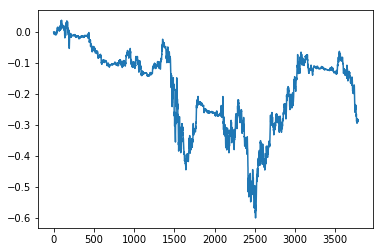

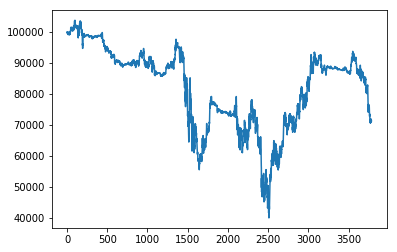

In [17]:
import matplotlib.pyplot as plt
l=len(train.index)-1
plt.figure()
plt.plot(range(l-1),pct_change[:l-1])
#plt.subplot(122)
plt.figure()
plt.plot(range(l-1),profit[:l-1])
plt.show()

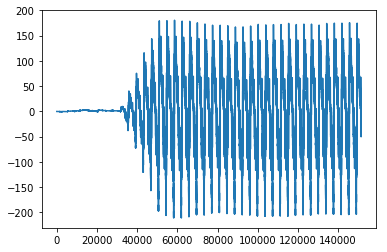

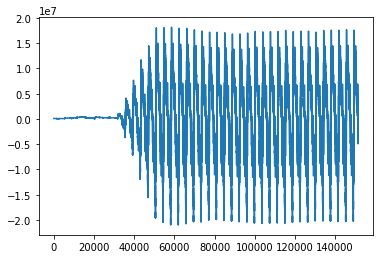

In [18]:
import matplotlib.pyplot as plt
l=len(profit)
plt.figure()
plt.plot(range(l-1),pct_change[:l-1])
#plt.subplot(122)
plt.figure()
plt.plot(range(l-1),profit[:l-1])
plt.show()

In [20]:
    running_reward = 0
    timestep=0
    avg_length = 0
    # training loop
    prediction=[]
    env = Simulator(test,prediction)
        
    state = env.init_state()
    done=False
    while(done==False):
            timestep += 1
            # Running policy_old:
            action = ppo.policy_old.act(state, memory)
            state, reward, done= env.step(action)
            
            # Saving reward and is_terminal:
            memory.rewards.append(reward)
            memory.is_terminals.append(done)
            
            # update if its time
            if timestep % update_timestep == 0:
                ppo.update(memory)
                memory.clear_memory()
                timestep = 0
            
            running_reward += reward
            avg_length  +=1
            if done:
            
                print('Episode {} \t avg length: {} \t reward: {}'.format(i_episode, avg_length, running_reward))
                running_reward = 0
                avg_length = 0
            

89037.0
Episode 39 	 avg length: 668 	 reward: -10963.0


In [21]:
pct_change_1=[]
profit_1=[]
for i in range(len(prediction)):
    pct_change_1.append(prediction[i][0])
    profit_1.append(prediction[i][1])

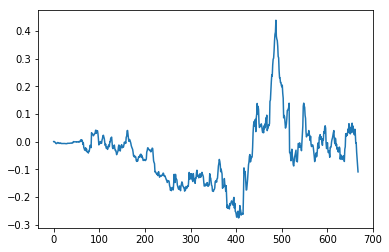

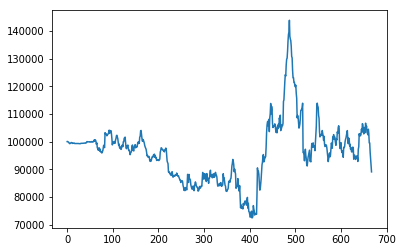

In [22]:
l=len(profit_1)
plt.figure()
plt.plot(pct_change_1)
#plt.subplot(122)
plt.figure()
plt.plot(profit_1)
plt.show()